In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'stix'  # or other, 'dejavuserif'
plt.rcParams['font.family'] = 'serif'  # or 'DejaVu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']  # 'DejaVu Serif' serif' 'Times'

In [2]:
# Define labels for the metrics to be plotted
metric_labels = {
            "precision": "Precision",
            "recall": "Recall",
            "f1_score": "F1-Score",
            "auc": "AUC"
        }
metric_used = "AUC"

## 0. Baseline model

In [3]:
# Get the best baseline model
baseline_model = pd.read_csv("../experiments/perf_summary/baseline_val_results.csv").query(f'tuned_by == "{metric_used}"')["version"].astype(str).tolist()
baseline_test_perf = pd.read_csv("../results/metrics/baseline.csv")
baseline_test_perf["version"] = baseline_test_perf["version"].astype(str)
baseline_best = baseline_test_perf[baseline_test_perf["version"].isin(baseline_model)]
baseline_best

,accuracy,precision,recall,f1_score,auc,version,timestamp
7,0.792965,0.493027,0.560171,0.524459,0.799619,202504180245,2025-04-20 21:20:52


## 1. Trade-off of DP-SGD Models

In [4]:
# Read the test performance of the DP-SGD models
dpsgd_models = pd.read_csv("../experiments/perf_summary/dpsgd_val_results.csv").query(f'tuned_by == "{metric_used}"')["version"].astype(str).tolist()
dpsgd_test_perf = pd.read_csv("../results/metrics/dpsgd.csv")
dpsgd_test_perf["version"] = dpsgd_test_perf["version"].astype(str)
dpsgd_best = dpsgd_test_perf[dpsgd_test_perf["version"].isin(dpsgd_models)].sort_values(by="eps", ascending=True)
dpsgd_best

,accuracy,precision,recall,f1_score,auc,version,eps,delta,timestamp
12,0.735009,0.371187,0.432548,0.399525,0.631714,202504201115,0.5,0.00001,2025-04-20 19:53:51
0,0.743912,0.412247,0.602570,0.489562,0.749953,202504191621,1.0,0.00001,2025-04-20 00:28:59
4,0.748538,0.420222,0.615846,0.499566,0.751521,202504200033,3.0,0.00001,2025-04-20 09:58:16
8,0.758488,0.437824,0.651392,0.523670,0.758882,202504201003,5.0,0.00001,2025-04-20 12:46:47


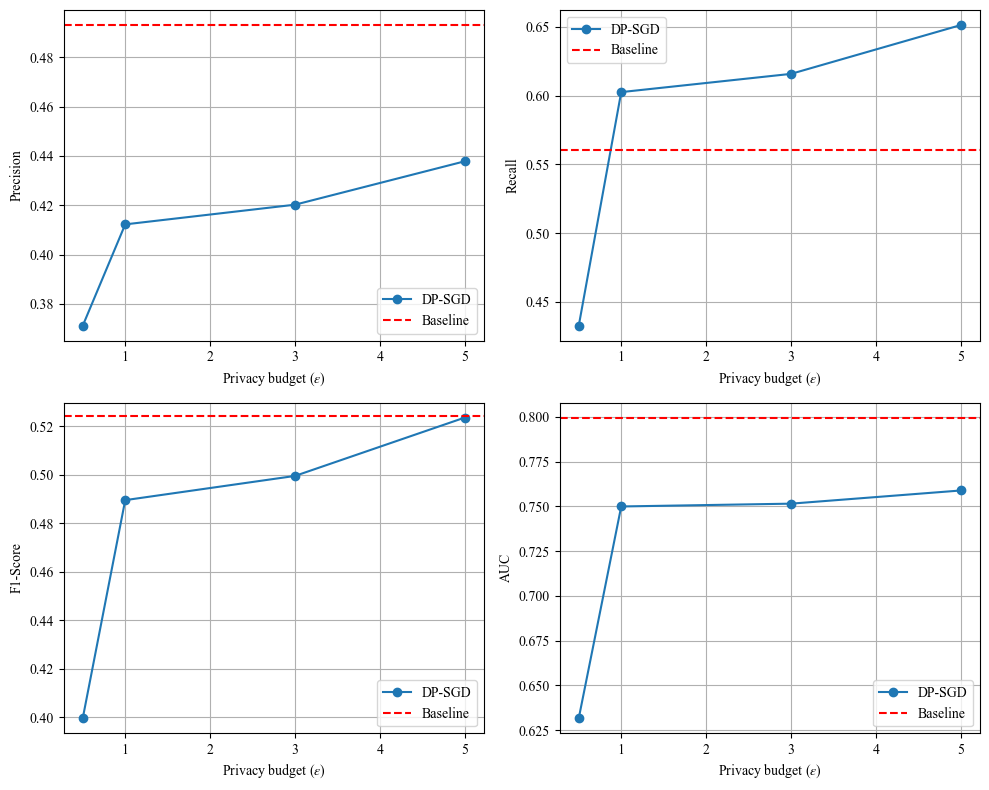

In [5]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, metric in enumerate(metric_labels.keys()):
    ax = axes[i]
    ax.plot(dpsgd_best['eps'], dpsgd_best[metric], marker='o', label='DP-SGD')
    ax.axhline(y=baseline_best[metric].tolist()[0], color='red', linestyle='--', label='Baseline')
    ax.set_ylabel(metric_labels[metric])
    ax.legend(loc='best')
    ax.grid(True)
    ax.set_xlabel(r'Privacy budget ($\varepsilon$)')

plt.tight_layout()
plt.show()